<a href="https://colab.research.google.com/github/inesita44/matematicas/blob/main/Grafos/Practica_2_grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 2. Grafos**

## **PRÁCTICA 2.1**
**Algoritmo de Dijkstra**

1. Mira estos vídeos:
 * [Algoritmo de DIJKSTRA ruta corta](https://youtu.be/6rl0ghgPfK0)
 * [Ruta mas corta en una red, algoritmo de Dijkstra](https://youtu.be/rh02c7v3EKY)
2. ¿Qué utilidad tiene el algoritmo?
3. Explique el algoritmo.
4. De un ejemplo de un grafo resuelto con el algoritmo de Dijkstra.
* Muestre la imagen del grafo con sus:
  - nodos
  - aristas (con flecha si son orientadas)
  - pesos (distancias o costes)
* Muestre nuevamente la imagen del grafo pero en esta ocasión con la solución.

##**SOLUCIÓN 2.1**

*   El Algoritmo de DIJKSTRA nos permite encontrar la ruta más corta.
*   Consiste en ir comprobando los caminos más cortos que comienzan en el vértice origen hasta el resto de vértices de un grafo. Al conseguir el camino más corto desde este vértice origen hasta el resto de los vértices, el algoritmo se detiene, es decir, finaliza ya que ha completado su misión.
*   Grafo sin resolver y resuelto.

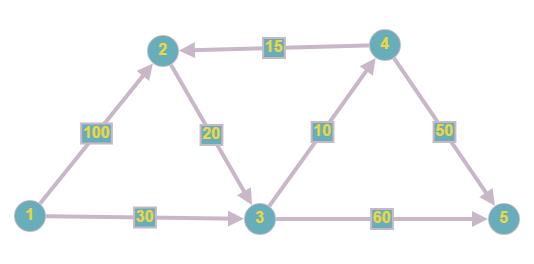


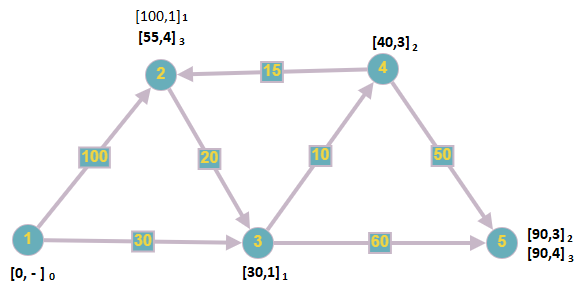

**- Ejemplo: ¿Cuál es la ruta más corta entre el nodo 1 y el nodo 5?**

 La solución es 90, es decir partes del nodo 1 al 3 y ya por último llegas al nodo final que es el 5.

## **PRÁCTICA 2.2**
Vea el video:

* [Camino mas corto Solver](https://youtu.be/LYeMWlTfOgA)

Se pide:  
1. Replique en un archivo de Excel el caso del vídeo, en la Hoja 1. En el método de resolución de Solver elija el método Simplex.
2. En la Hoja 2, aplique esa metodología usando Solver a otro grafo de su invención. Dibuje el grafo, con sus nodos, flechas y pesos, y resuélvalo.
3. Suba el archivo de Excel creado a la tarea del Aula Virtual.

##**SOLUCIÓN 2.2**
*   EXCEL SUBIDO EN EL AULA VIRTUAL




##**PRÁCTICA 2.3**
1. Muestre el enlace a alguna página donde se de el algoritmo de Dijkstra programado en **Python**.
2. Pruebe su código con algún grafo de ejemplo.

##**SOLUCIÓN 2.3** 
https://www.techiedelight.com/es/single-source-shortest-paths-dijkstras-algorithm/
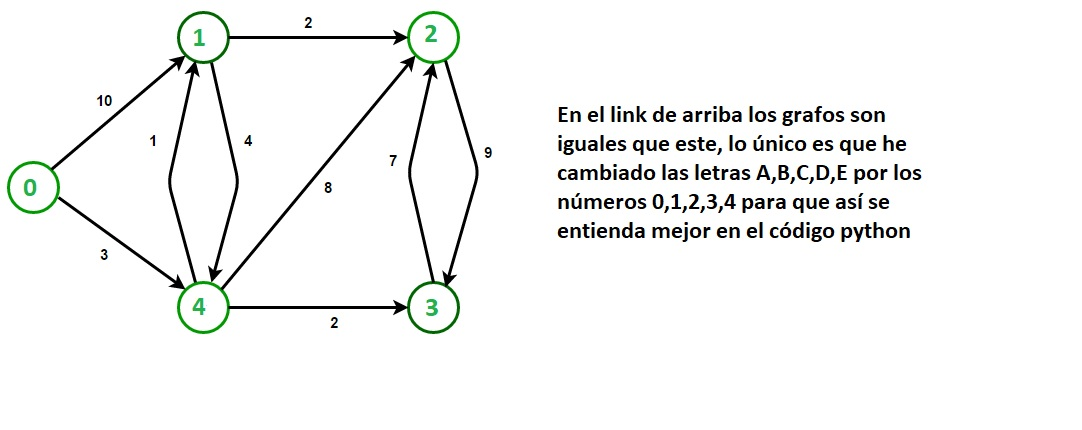

In [ ]:
import sys
from heapq import heappop, heappush
 
 
# Una clase para almacenar un nodo de heap
class Node:
    def __init__(self, vertex, weight=0):
        self.vertex = vertex
        self.weight = weight
 
    # Anule la función __lt__() para hacer que la clase `Node` funcione con un min-heap
    def __lt__(self, other):
        return self.weight < other.weight
 
 
# Una clase para representar un objeto graph
class Graph:
    def __init__(self, edges, n):
        # asigna memoria para la lista de adyacencia
        self.adjList = [[] for _ in range(n)]
 
        # agrega bordes al graph dirigido
        for (source, dest, weight) in edges:
            self.adjList[source].append((dest, weight))
 
 
def get_route(prev, i, route):
    if i >= 0:
        get_route(prev, prev[i], route)
        route.append(i)
 
 
# Ejecutar el algoritmo de Dijkstra en un graph dado
def findShortestPaths(graph, source, n):
 
    # crea un min-heap y empuja el nodo de origen con una distancia de 0
    pq = []
    heappush(pq, Node(source))
 
    # establece la distancia inicial desde la fuente a `v` como infinito
    dist = [sys.maxsize] * n
 
    # distancia de la fuente a sí mismo es cero
    dist[source] = 0
 
    # Lista # para rastrear vértices para los cuales ya se encontró el costo mínimo
    done = [False] * n
    done[source] = True
 
    # almacena el predecesor de un vértice (en una ruta de impresión)
    prev = [-1] * n
 
    # se ejecuta hasta que el min-heap esté vacío
    while pq:
 
        node = heappop(pq)      # Quitar y devolver el mejor vértice
        u = node.vertex         # obtener el número de vértice
 
        # hacer para cada vecino `v` de `u`
        for (v, weight) in graph.adjList[u]:
            if not done[v] and (dist[u] + weight) < dist[v]:        # Escalón de relajación
                dist[v] = dist[u] + weight
                prev[v] = u
                heappush(pq, Node(v, dist[v]))
 
        # marca el vértice `u` como hecho para que no se vuelva a recoger
        done[u] = True
 
    route = []
    for i in range(n):
        if i != source and dist[i] != sys.maxsize:
            get_route(prev, i, route)
            print(f'({source} —> {i}): valor acumulado mínimo = {dist[i]}, Recorrido = {route}')
            route.clear()
 
 
if __name__ == '__main__':
 
    # inicializa los bordes según el diagrama anterior
    # (u, v, w) representa la arista del vértice `u` al vértice `v` con peso `w`
    edges = [(0, 1, 10), (0, 4, 3), (1, 2, 2), (1, 4, 4), (2, 3, 9), (3, 2, 7),
            (4, 1, 1), (4, 2, 8), (4, 3, 2)]
 
    # número total de nodos en el graph (etiquetados de 0 a 4)
    n = 5
 
    # graph de construcción
    graph = Graph(edges, n)
 
    # ejecuta el algoritmo de Dijkstra desde cada nodo
    for source in range(n):
        findShortestPaths(graph, source, n)

(0 —> 1): valor acumulado mínimo = 4, Recorrido = [0, 4, 1]
(0 —> 2): valor acumulado mínimo = 6, Recorrido = [0, 4, 1, 2]
(0 —> 3): valor acumulado mínimo = 5, Recorrido = [0, 4, 3]
(0 —> 4): valor acumulado mínimo = 3, Recorrido = [0, 4]
(1 —> 2): valor acumulado mínimo = 2, Recorrido = [1, 2]
(1 —> 3): valor acumulado mínimo = 6, Recorrido = [1, 4, 3]
(1 —> 4): valor acumulado mínimo = 4, Recorrido = [1, 4]
(2 —> 3): valor acumulado mínimo = 9, Recorrido = [2, 3]
(3 —> 2): valor acumulado mínimo = 7, Recorrido = [3, 2]
(4 —> 1): valor acumulado mínimo = 1, Recorrido = [4, 1]
(4 —> 2): valor acumulado mínimo = 3, Recorrido = [4, 1, 2]
(4 —> 3): valor acumulado mínimo = 2, Recorrido = [4, 3]


## **PRÁCTICA 2.4**
* Dibuja un grafo que tenga un mínimo de 6 nodos
* Crea en **Python** su **matriz de adyacencia**
* Crea en Python su **lista de adyacencia**
* ¿Son cero todos los elementos de la diagonal principal?
 - En qué caso serían todos cero y en qué caso no.
* ¿Es una matriz simétrica?
 - En qué caso sería simétrica y en qué caso no.
* Suma todos los valores de la matriz
* Comprueba si funcionan bien o no los siguientes códigos:
 - El primero permite convertir una matriz de adyacencia en una lista de adyacencia.
 - El segundo permite convertir una lista de adyacencia en una matriz de adyacencia.
* Dibuja el grafo del ejemplo que se usa en este código.

In [1]:
def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = len(matrix)
    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i]==1:
                res[start].append(i)
        start +=1
    return res

matrix =[[0,1,1,1,0,1,1,0,0],[1,0,0,1,0,0,1,1,0],[1,0,0,1,0,0,0,0,0],[1,1,1,0,1,0,0,0,0],[0,0,0,1,0,1,0,0,1],[1,0,0,0,1,0,0,0,1],[1,1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,0,0,1,1,0,0,0]]
print(convert_to_adjacency(matrix))

[[1, 2, 3, 5, 6], [0, 3, 6, 7], [0, 3], [0, 1, 2, 4], [3, 5, 8], [0, 4, 8], [0, 1], [1], [4, 5]]


In [7]:
def convert_to_matrix(graph):
    matrix =[]
    for i in range(len(graph)): 
        matrix.append([0]*len(graph))
        for j in graph[i]:
            matrix[i][j]=1
    return matrix

lst =[[1,2,3,5,6],[0,3,6,7],[0,3],[0,1,2,4],[3,5,8],[0,4,8],[0,1],[1],[4,5]]
print(convert_to_matrix(lst))

[[0, 1, 1, 1, 0, 1, 1, 0, 0], [1, 0, 0, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0]]


## **SOLUCIÓN 2.4**

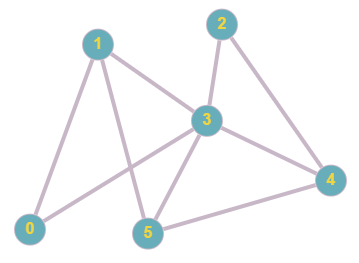

In [5]:
def convert_to_matrix(graph):
    matrix =[]
    for i in range(len(graph)): 
        matrix.append([0]*len(graph))
        for j in graph[i]:
            matrix[i][j]=1
    return matrix

lst =[[1, 3], [0, 3, 5], [3, 4], [0, 1, 2, 4, 5], [2, 3, 5], [1, 3, 4]]
print(convert_to_matrix(lst))

[[0, 1, 0, 1, 0, 0], [1, 0, 0, 1, 0, 1], [0, 0, 0, 1, 1, 0], [1, 1, 1, 0, 1, 1], [0, 0, 1, 1, 0, 1], [0, 1, 0, 1, 1, 0]]


In [3]:
def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = len(matrix)
    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i]==1:
                res[start].append(i)
        start +=1
    return res

matrix =[[0, 1, 0, 1, 0, 0], [1, 0, 0, 1, 0, 1], [0, 0, 0, 1, 1, 0], [1, 1, 1, 0, 1, 1], [0, 0, 1, 1, 0, 1], [0, 1, 0, 1, 1, 0]] 
print(convert_to_adjacency(matrix))

[[1, 3], [0, 3, 5], [3, 4], [0, 1, 2, 4, 5], [2, 3, 5], [1, 3, 4]]


* En mi matriz sí son cero todos los elementos de la diagonal principal, si hubiese algún **1** significaría que hay algún **bucle o loop** que es una arista que conecta un vértice consigo mismo. 

*  Mi matriz, sí es una **matriz simétrica**, coinciden los elementos situados simétricamente respecto a la diagonal principal y también al hacer la traspuesta da como resultado la matriz inicial, ya que los grafos no dirigidos deben tener matrices simétricas y en cambio los grafos dirigidos típicamente tienen matrices no simétricas.

 

In [1]:
#suma de todos los elementos de la matriz
import numpy as np

array1 = np.array ([[0, 1, 0, 1, 0, 0], [1, 0, 0, 1, 0, 1], [0, 0, 0, 1, 1, 0], [1, 1, 1, 0, 1, 1], [0, 0, 1, 1, 0, 1], [0, 1, 0, 1, 1, 0]])

total = np.sum(array1)
print( f'La suma de todos los valores de la matriz es {total}')

La suma de todos los valores de la matriz es 18



*   Sí, los he comprobado y ambos códigos de python funcionan a la perfección. Dicha matriz de adyacencia y dicha lista de adyacencia dan lugar a este grafo:


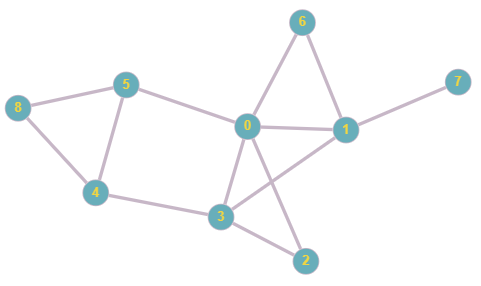

## **PRÁCTICA 2.5**
**Árboles binarios**
* Mira este vídeo: [¿Qué son los ÁRBOLES BINARIOS y por qué son tan geniales?](https://youtu.be/lMTaNbJAqvM)
* ¿Qué son los **árboles binarios de búsqueda**? (en inglés: BST (Binary Search Tree))
* Mira este vídeo: [Recorrido de Árboles Binarios](https://youtu.be/WCiwBrj8EQY)
* Qué significa recorrer el árbol en:
 - preorden
 - inorden
 - postorden
* Al BST del vídeo anterior añadele dos nodos de tu elección, de forma que continúe siendo un BST, dibujalo (poniendo en color azul claro los dos nodos nuevos) y da su recorrido en:
 - preorden
 - inorden (observa que en este caso los nodos deben quedar ordenados de menor a mayor)
 - postorden
* ¿Por qué los BST son importantes en ciencias de la computación?
* Pon un link a una página o vídeo que trate este tema en **Python**.
* ¿Has probado el código en Python que comentas? ¿Funciona con el BST que has puesto como ejemplo?

##**SOLUCIÓN 2.5**
*   **Los árboles binarios de búsqueda** son estructuras ordenadas de datos donde cada registro (nodo) puede estar relaccionado con otros dos registros, teniendo que complir las siguientes condiciones para todos los nodos:
 - Si el nodo tiene un hijo izquierdo, éste tiene que ser menor que él.
 - Si el nodo tiene un hijo derecho, éste tiene que ser mayor que él.

*   **Preorden**, comenzando en la raíz, luego el subárbol izquierdo y se finaliza con el subárbol derecho.
*   **Inorden**,  comenzando en el subárbol izquierdo, luego la raíz y se finaliza con el subárbol derecho.
*   **Postorden**, comenzando en el subárbol izquierdo, luego el subárbol derecho y se finaliza con la raíz.

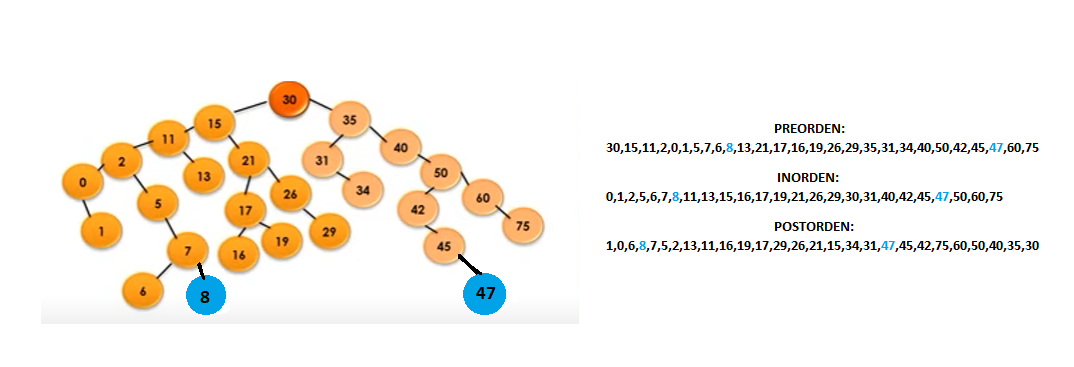


* **los BST son importantes en ciencias de la computación** debido a que nos ayudan a hacer busquedas y a ordenar datos de una manera muy eficaz y rápida.

* https://youtu.be/d0ibZK_6Q7g en este video se explica genial.

* Sí, he probado el código en Python con el BST dibujado anteriormente arriba, y como era de esperar funciona a la perfección.


## **PRÁCTICA 2.6**
* ¿Qué es un **camino hamiltoniano**?
* Pon un ejemplo
* Dibújalo
* Resulevelo
* ¿Qué utilidad tiene?
* Muestra los enlaces a par de vídeos que hablen de ello

##**SOLUCIÓN 2.6**

*   Un **camino hamiltoniano** es un camino que pasa por todos los vértices de un grafo una sola vez y su utilidad es encontrar el camino más óptimo.



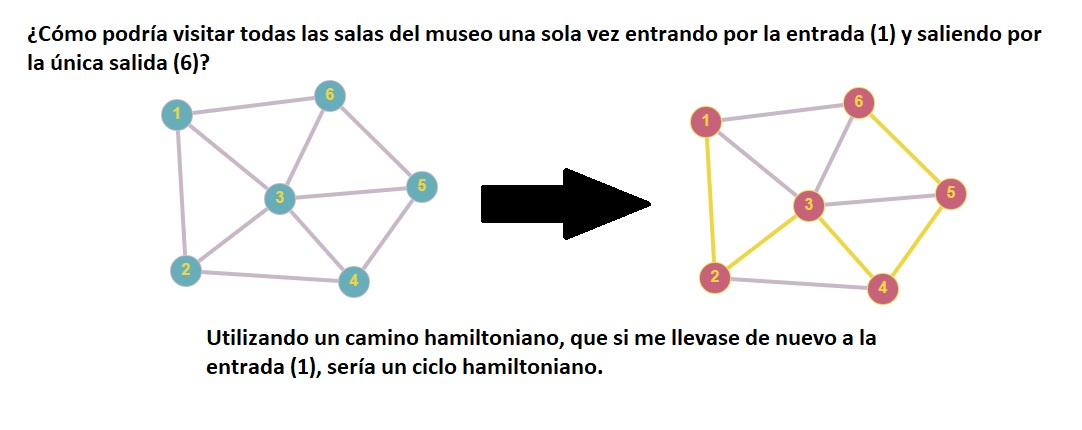
- https://youtu.be/ueE7IAfLmqk
- https://youtu.be/h6_2Vm30NKE

## **PRÁCTICA 2.7**
* Mira este vídeo:
 - [Un problema matemático de ciudades y carreteras](https://youtu.be/kwU1uIbylsM)
* Dibuja el grafo y da tu solución

##**SOLUCIÓN 2.7**
La respuesta es que **no hay solución**, ya que no existe un camino que pase por cada ciudad una sola vez volviendo a la ciudad desde la que se comenzó.

Para comprobarlo, asignaremos a cada ciudad un color de tal manera que si 2 ciudades están unidas por una carretera tendrán colores diferentes.

De esta forma nos servirá con dos colores: **azul y rojo**. Teniendo así 6 azules y 5 rojas de un total de 11 ciudades.

Si comienzo en una azul, luego llegaré a una azul/roja/azul/roja acabando en una azul. Pero entre la azul en la que acabo y la azul en la que empecé no hay carretera, pues las dos son azules y por tanto no puedo volver.

Si comienzo en una roja será mucho peor porque rojas hay menos, haré rojo, azul, rojo, azul y acabaré atascada antes de haber gastado todas las ciudades.
**Por tanto, no tiene solución, este grafo no tiene ningún camino hamiltoniano.**

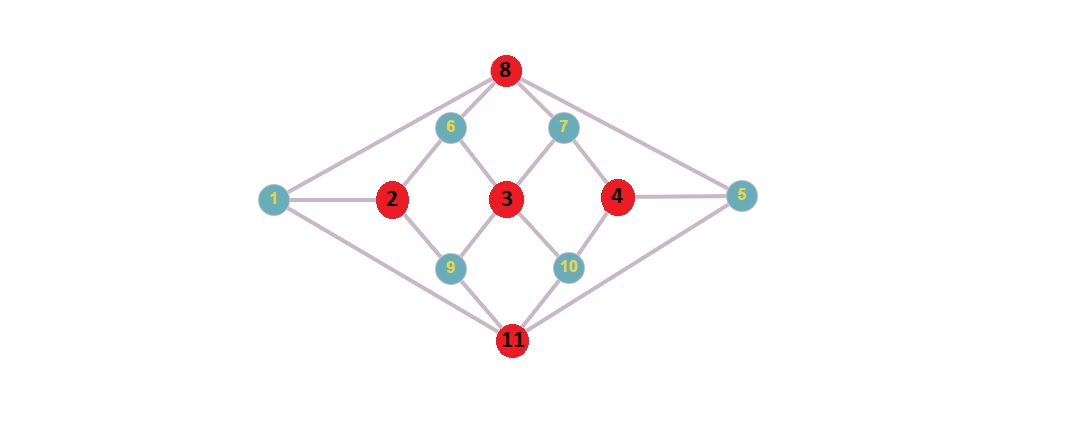

## **PRÁCTICA 2.8**
* El problema de **los puentes de Königsberg**
* Describe el problema
* Muestra una imagen del grafo resultante
* Quién fue *Euler* y qué hizo para resolver el problema

##**SOLUCIÓN 2.8**
El problema de los puentes de Königsberg dio lugar a la **Teoría de Grafos** por el matemático y físico suizo, del siglo XVIII, Euler.

El problema se les planteaba a los vecinos de la **ciudad de Königsberg** que estaba dividida en 4 zonas por el **río Pregel** donde había **7 puentes** que comunicaban estas partes de la ciudad. Ellos querían encontrar la manera de recorrer la ciudad cruzando cada puente **sólo una vez** para regresar al lugar de partida.

**Euler** demostró que no era posible encontrar tal ruta y para ello dibujó un grafo donde los vértices serían las 4 zonas de la ciudad y las aristas serían los 7 puentes que unían tales zonas.

Comprobando así la **imposibilidad** de encontrar un recorrido que pasase por cada zona de la ciudad cruzando cada puente una sola vez y regresando al inicio de la ruta.

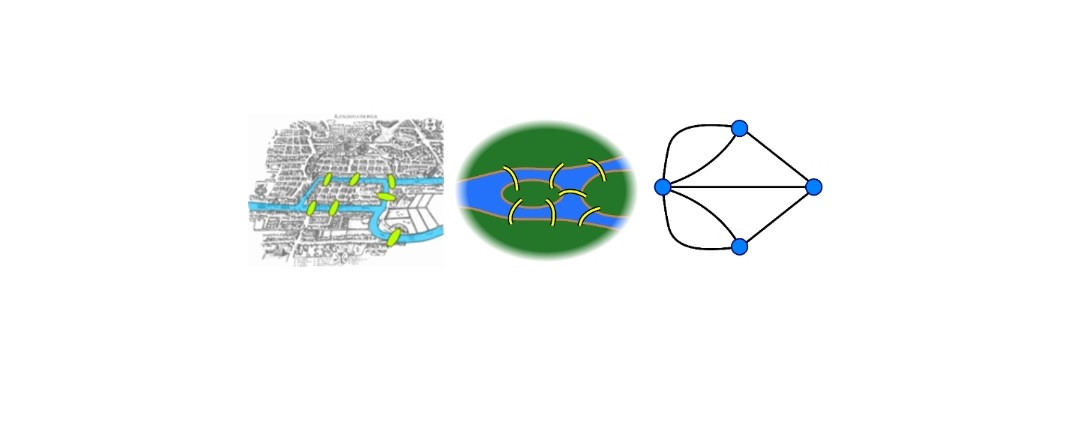

## **PRÁCTICA 2.9**
* ¿Qué son los **caminos eulerianos**?
* ¿Qué son los **ciclos eulerianos**?
* Da los enlaces a dos vídeos que hable de ello
* Dibuja un par de casos

##**SOLUCIÓN 2.9**
 
*   Un **camino euleriano**, es un camino que recorre todas las aristas de un grafo una sola vez, puediendo pasar por un mismo vértice varias veces.
*   Un **ciclo euleriano**, es un camino euleriano que comienza y termina en el mismo vértice.
*   https://youtu.be/w8d-4FyrbYk
*   https://youtu.be/UfEBB0uSreU

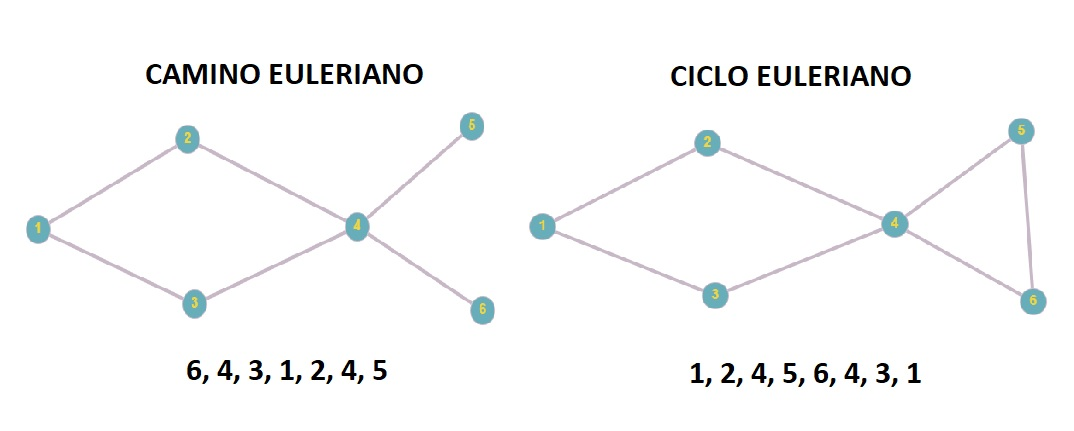

##**PRÁCTICA 2.10**
* Mira estos vídeos:
 - [¿Puedes dibujarlo sin despegar el lápiz?](https://youtu.be/IZ0-xFrlvag)
 - [USA esta LÓGICA cuando NO PUEDAS con un PROBLEMA](https://youtu.be/5Ncb7eU0LkQ)
* Caso 1: dibuja un grafo en el que si sea posible y resuélvelo
* Caso 2: dibuja un grafo en el que no sea posible y di el motivo

##**SOLUCIÓN 2.10**

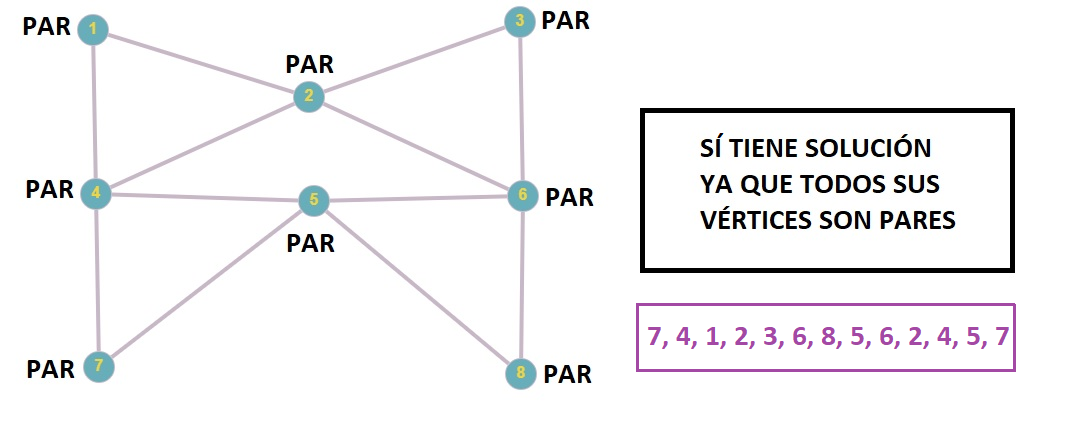







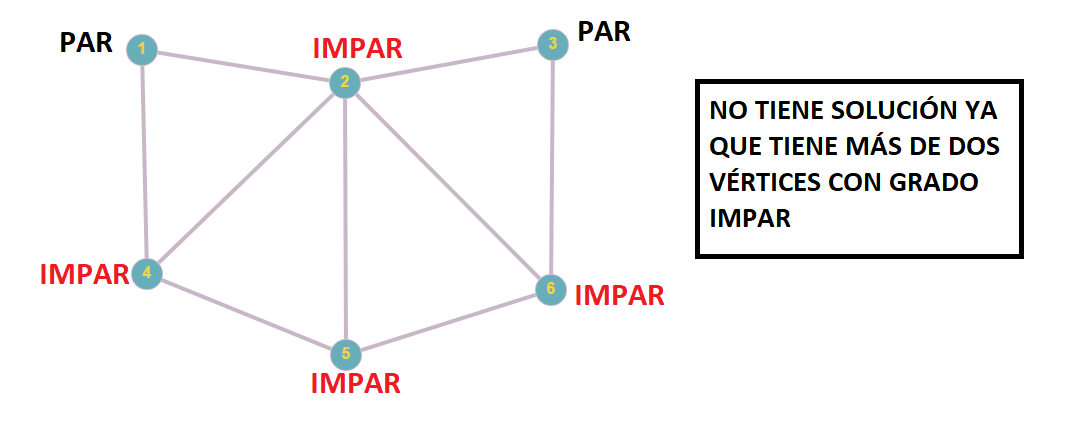